In [11]:
import numpy as np
import pandas as pd

In [12]:
# import pandas as pd

# # Load your datasets
# df1 = pd.read_csv('/content/NIFTY 50-01-01-2015-to-31-12-2015.csv')
# df2 = pd.read_csv('/content/NIFTY 50-01-01-2016-to-31-12-2016.csv')
# df3 = pd.read_csv('/content/NIFTY 50-01-01-2017-to-31-12-2017.csv')
# df4 = pd.read_csv('/content/NIFTY 50-01-01-2018-to-31-12-2018.csv')
# df5 = pd.read_csv('/content/NIFTY 50-01-01-2019-to-31-12-2019.csv')
# df6 = pd.read_csv('/content/NIFTY 50-01-01-2020-to-31-12-2020.csv')
# df7 = pd.read_csv('/content/NIFTY 50-01-01-2021-to-31-12-2021.csv')
# df8 = pd.read_csv('/content/NIFTY 50-01-01-2022-to-31-12-2022.csv')
# df9 = pd.read_csv('/content/NIFTY 50-31-10-2022-to-31-10-2023.csv')

# # Merge datasets
# merged_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], axis=0, ignore_index=True)

# # Save the merged dataset
# merged_df.to_csv('merged_dataset.csv', index=False)


In [13]:
df=pd.read_csv('/content/merged_dataset.csv')

In [14]:
df.head(10)

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,09-NOV-2015,7788.25,7937.75,7771.70,7915.20,218422388.0,9376.17
1,10-NOV-2015,7877.60,7885.10,7772.85,7783.35,170267413.0,7153.47
2,11-NOV-2015,7838.80,7847.95,7819.10,7825.00,22380435.0,1123.44
3,13-NOV-2015,7762.45,7775.10,7730.90,7762.25,165876819.0,7731.55
4,16-NOV-2015,7732.95,7838.85,7714.15,7806.60,154134885.0,6871.15
5,17-NOV-2015,7848.75,7860.45,7793.00,7837.55,149451211.0,6367.14
6,18-NOV-2015,7823.15,7843.40,7725.05,7731.80,148037721.0,6112.32
7,19-NOV-2015,7788.50,7854.90,7765.45,7842.75,136702518.0,7410.15
8,20-NOV-2015,7841.90,7906.95,7817.80,7856.55,156610433.0,7298.01
9,23-NOV-2015,7869.50,7877.50,7825.20,7849.25,130871603.0,6099.09


In [15]:
df.isnull()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2014,False,False,False,False,False,False,False
2015,False,False,False,False,False,False,False
2016,False,False,False,False,False,False,False
2017,False,False,False,False,False,False,False


In [16]:
df.columns

Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ',
       'Turnover (₹ Cr)'],
      dtype='object')

In [17]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open '],
                high=df['High '],
                low=df['Low '],
                close=df['Close '])])

fig.show()

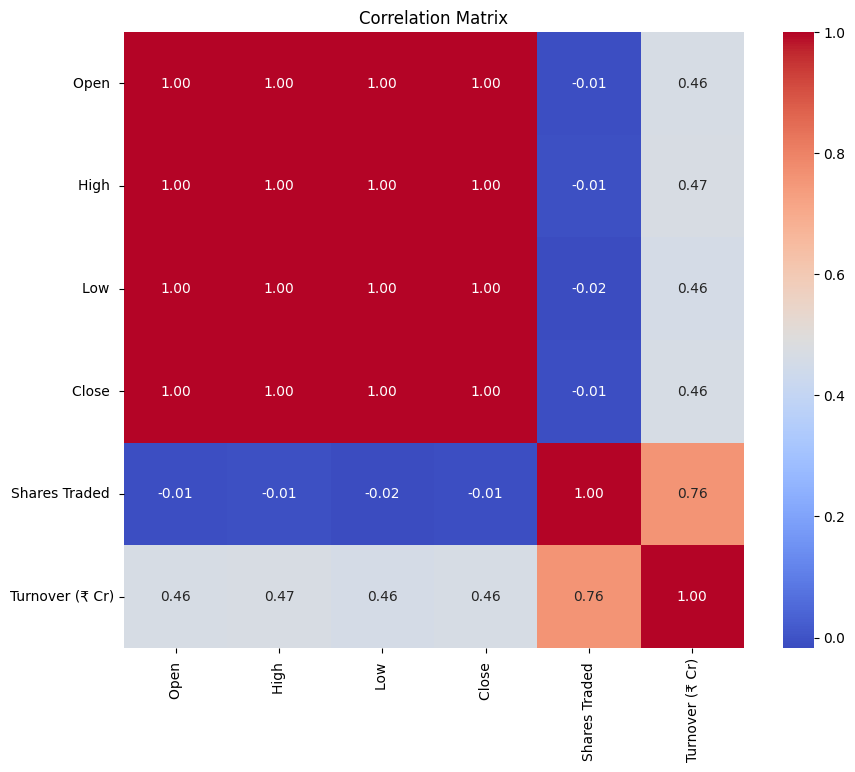

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df[['Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ', 'Turnover (₹ Cr)']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [19]:
null_values = df.isnull().sum()
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
Date               4
Open               4
High               4
Low                4
Close              4
Shares Traded      3
Turnover (₹ Cr)    3
dtype: int64


In [20]:
# Drop rows with null values
df.dropna(subset=['Date ', 'Open ','High ','Low ','Close ', 'Shares Traded ', 'Turnover (₹ Cr)' ], inplace=True)

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df[['Open ']]
Y = df[['High ', 'Low ', 'Close ']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
X_test.head()

,Open
1322,15321.15
526,10457.30
393,9615.55
1410,15736.60
433,9961.15


In [23]:
Y_test.head()

,High,Low,Close
1322,15336.30,14953.60,15030.95
526,10501.10,10448.25,10493.00
393,9654.15,9595.40,9606.90
1410,15834.80,15726.40,15824.05
433,9969.80,9893.05,9908.05


In [24]:
# Initialize a Random Forest Regressor
base_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a MultiOutputRegressor
model = MultiOutputRegressor(base_regressor)

# Train the model
model.fit(X_train, Y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [25]:
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 8803.881581428519
Mean Absolute Error: 64.37144401020201
R-squared: 0.9993699696702262


In [26]:

new_open_value = [[15321.15]]
new_predictions = model.predict(new_open_value)

print(f'Predicted High: {new_predictions[0, 0]}')
print(f'Predicted Low: {new_predictions[0, 1]}')
print(f'Predicted Close: {new_predictions[0, 2]}')

actual_high = 15336.3
actual_low = 14953.6
actual_close = 15030.95

print(f'Actual High: {actual_high}')
print(f'Actual Low: {actual_low}')
print(f'Actual Close: {actual_close}')


Predicted High: 15372.409500000016
Predicted Low: 15235.9205
Predicted Close: 15322.484999999997
Actual High: 15336.3
Actual Low: 14953.6
Actual Close: 15030.95


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



SVR

In [27]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR

# Initialize different regressors
support_vector_regressor = SVR()

support_vector_model = MultiOutputRegressor(support_vector_regressor)

# Train the models
support_vector_model.fit(X_train, Y_train)


MultiOutputRegressor(estimator=SVR())

In [28]:
pred = support_vector_model.predict(X_test)

mse = mean_squared_error(Y_test, pred)
mae = mean_absolute_error(Y_test, pred)
r2 = r2_score(Y_test, pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 12148547.630806357
Mean Absolute Error: 2756.344882435395
R-squared: 0.13149704951430383


In [29]:

new_open_value = [[18177.90	]]
new_prediction = support_vector_model.predict(new_open_value)

print(f'Predicted High: {new_prediction[0, 0]}')
print(f'Predicted Low: {new_prediction[0, 1]}')
print(f'Predicted Close: {new_prediction[0, 2]}')

actual_high = 18178.75
actual_low = 18048.65
actual_close = 18082.85

print(f'Actual High: {actual_high}')
print(f'Actual Low: {actual_low}')
print(f'Actual Close: {actual_close}')


Predicted High: 12360.76476086901
Predicted Low: 12227.860913939212
Predicted Close: 12290.589862761564
Actual High: 18178.75
Actual Low: 18048.65
Actual Close: 18082.85


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names



LR

In [30]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

linear_regression_model = MultiOutputRegressor(linear_regression)

linear_regression_model.fit(X_train, Y_train)

MultiOutputRegressor(estimator=LinearRegression())

In [31]:
predi = linear_regression_model.predict(X_test)

mse = mean_squared_error(Y_test, predi)
mae = mean_absolute_error(Y_test, predi)
r2 = r2_score(Y_test, predi)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 6100.611840593399
Mean Absolute Error: 55.09976957578336
R-squared: 0.9995632709857044


In [32]:
new_open_value = [[18177.90	]]
new_predictions = linear_regression_model.predict(new_open_value)

print(f'Predicted High: {new_predictions[0, 0]}')
print(f'Predicted Low: {new_predictions[0, 1]}')
print(f'Predicted Close: {new_predictions[0, 2]}')

actual_high = 18178.75
actual_low = 18048.65
actual_close = 18082.85

print(f'Actual High: {actual_high}')
print(f'Actual Low: {actual_low}')
print(f'Actual Close: {actual_close}')


Predicted High: 18254.79785592926
Predicted Low: 18072.512332659004
Predicted Close: 18167.764532312576
Actual High: 18178.75
Actual Low: 18048.65
Actual Close: 18082.85


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



gbr

In [33]:
from sklearn.ensemble import  GradientBoostingRegressor

gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

gradient_boosting_model = MultiOutputRegressor(gradient_boosting_regressor)

gradient_boosting_model.fit(X_train, Y_train)


MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=42))

In [34]:
prediC = gradient_boosting_model.predict(X_test)

mse = mean_squared_error(Y_test, prediC)
mae = mean_absolute_error(Y_test, prediC)
r2 = r2_score(Y_test, prediC)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 7850.663200464281
Mean Absolute Error: 62.67927168812992
R-squared: 0.9994382453719725


In [35]:
new_open_value = [[18177.90	]]
new_predictionsS = gradient_boosting_model.predict(new_open_value)

print(f'Predicted High: {new_predictionsS[0, 0]}')
print(f'Predicted Low: {new_predictionsS[0, 1]}')
print(f'Predicted Close: {new_predictionsS[0, 2]}')

actual_high = 18178.75
actual_low = 18048.65
actual_close = 18082.85

print(f'Actual High: {actual_high}')
print(f'Actual Low: {actual_low}')
print(f'Actual Close: {actual_close}')

Predicted High: 18243.88366843505
Predicted Low: 18053.120364412483
Predicted Close: 18174.25463230029
Actual High: 18178.75
Actual Low: 18048.65
Actual Close: 18082.85


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names

